In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

In [14]:
df = pd.read_csv("../../data/homes_sf_ny/data.csv")

In [15]:
df.head()

,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation
0,0,2.0,1.0,999000,1960,1000,999,10
1,0,2.0,2.0,2750000,2006,1418,1939,0
2,0,2.0,2.0,1350000,1900,2150,628,9
3,0,1.0,1.0,629000,1903,500,1258,9
4,0,0.0,1.0,439000,1930,500,878,10


In [16]:
df['elevation'].median()

18.5

In [ ]:
len(df)

In [ ]:
len(df[df['in_sf'] == 0]),len(df[df['in_sf'] == 1])

In [ ]:
df1 = df[(df['elevation'] <= 30) & (df['in_sf'] == 0) ]
df2 = df[(df['elevation'] <= 30) & (df['in_sf'] == 1) ]
df3 = df[(df['elevation'] > 30) & (df['in_sf'] == 0) ]
df4 = df[(df['elevation'] > 30) & (df['in_sf'] == 1) ]
len(df1),len(df2),len(df3),len(df4)

In [3]:
f = open("../../data/homes_sf_ny/data.csv")
f.readline()
data = np.loadtxt(f,delimiter=",")
clf = tree.DecisionTreeClassifier()
Y = data[:,0]
X = data[:,1:]
clf = clf.fit(X,Y)

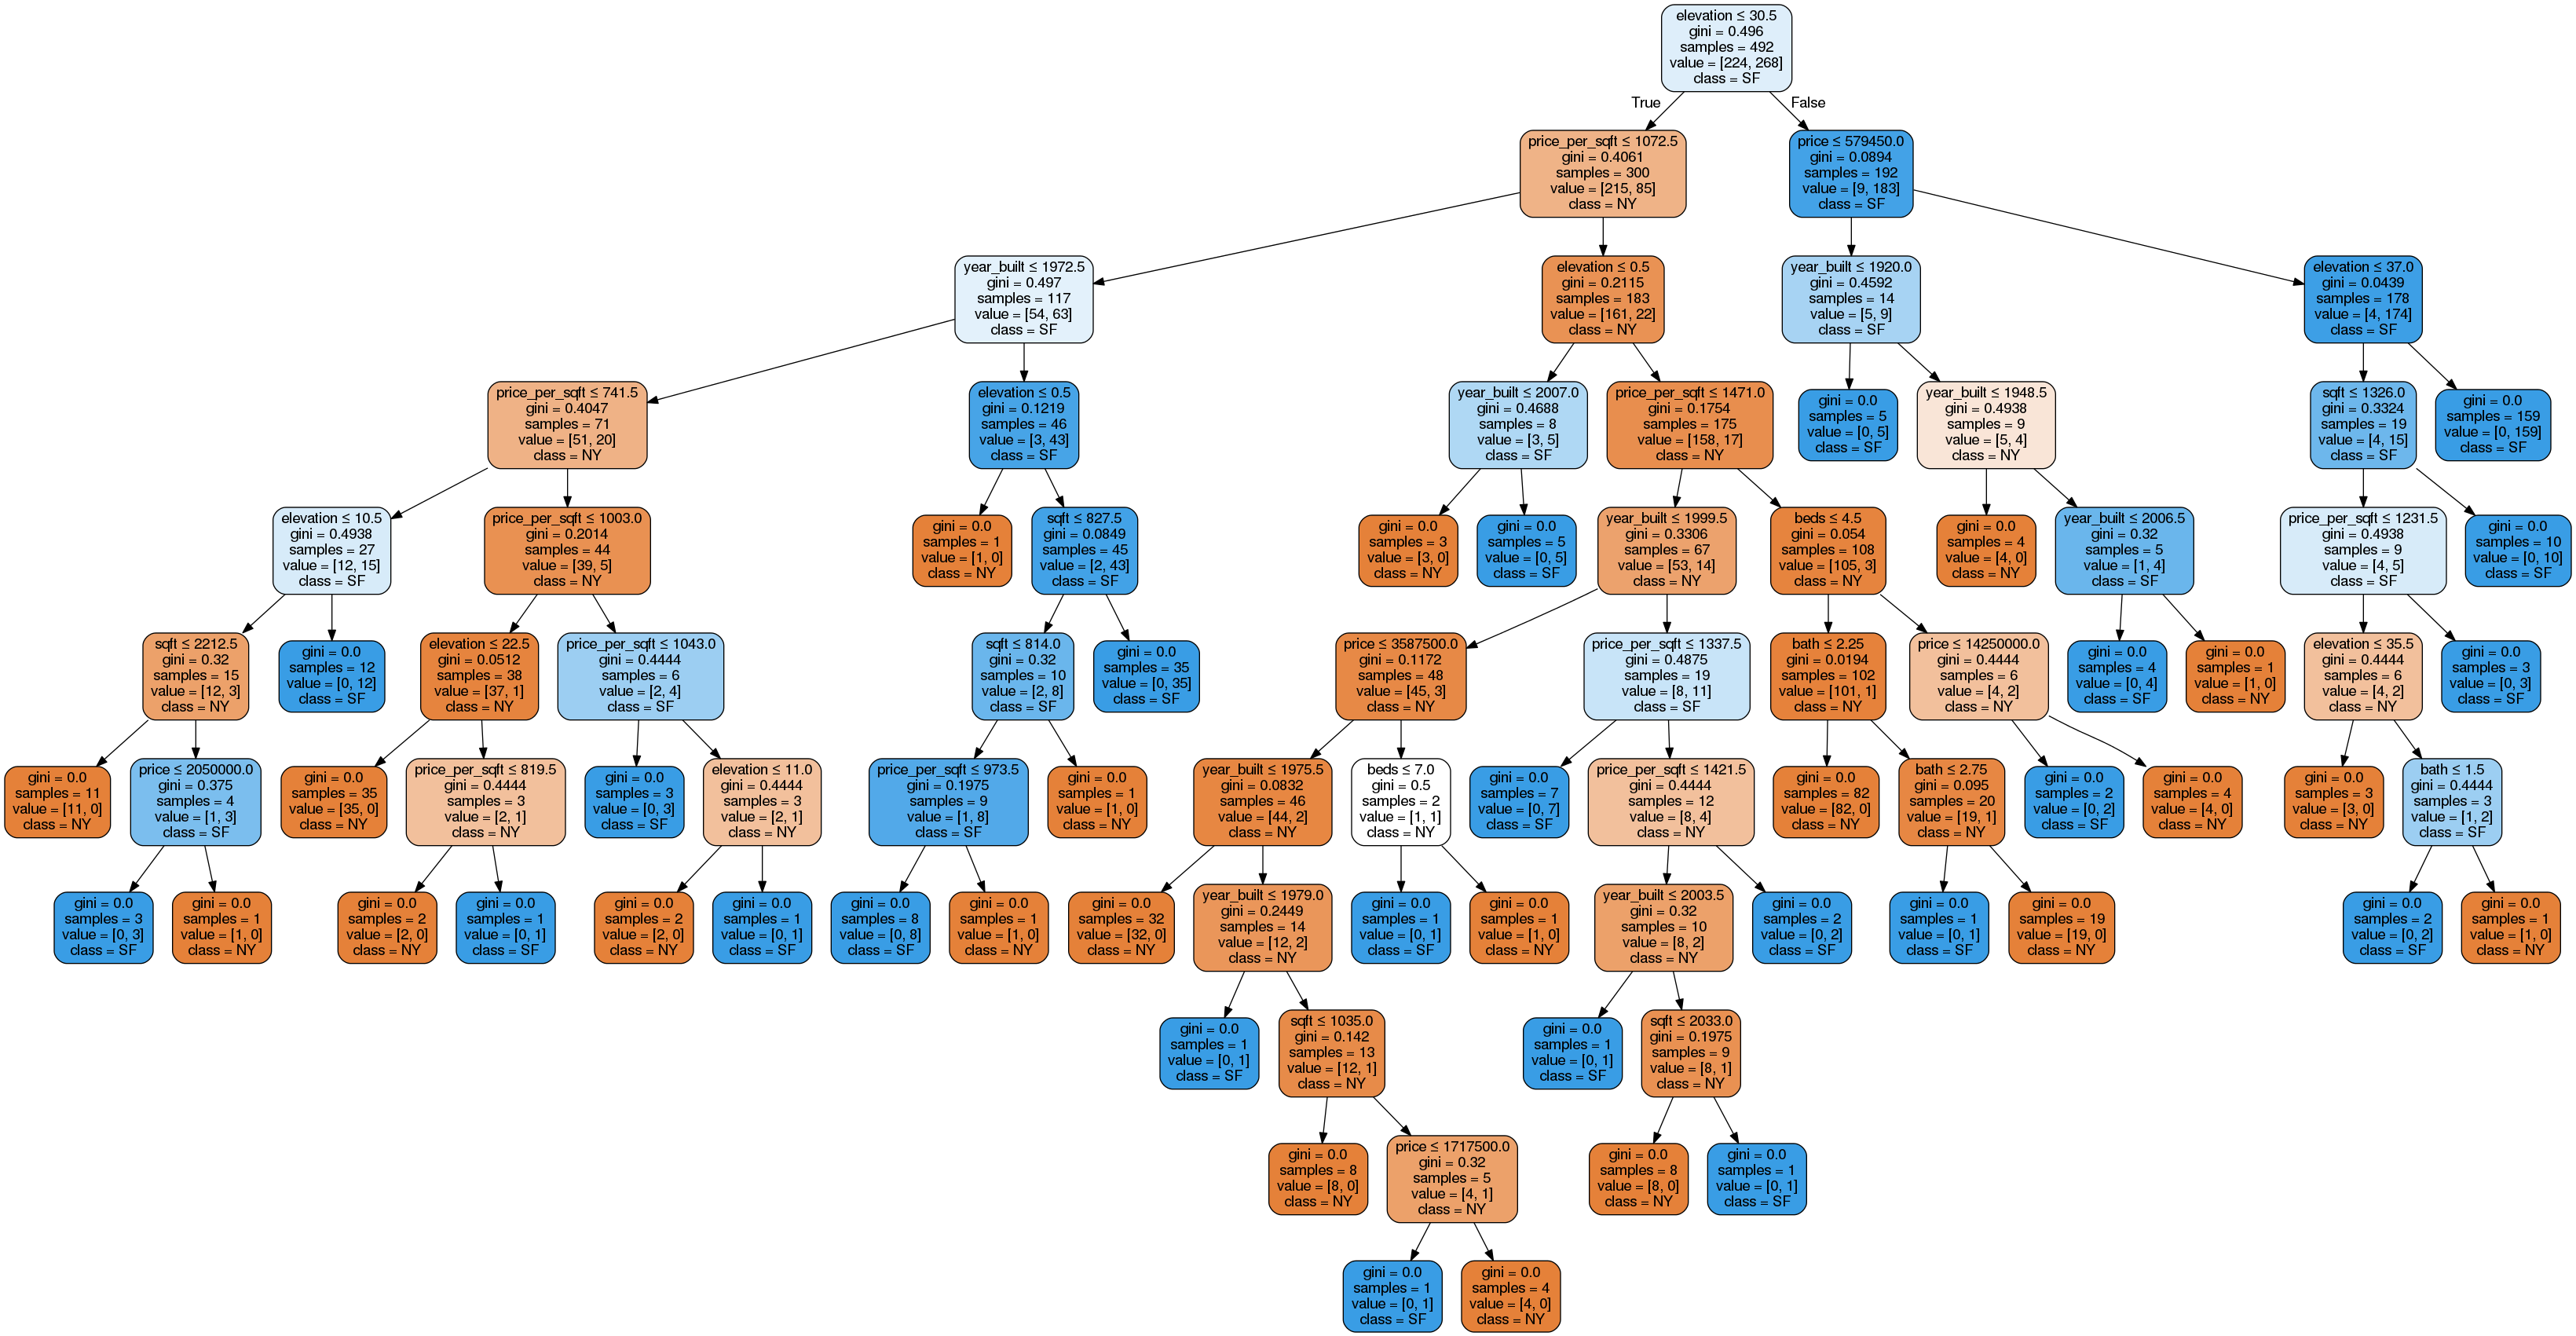

In [18]:
from IPython.display import Image  
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=["beds","bath","price","year_built","sqft","price_per_sqft","elevation"],  
                         class_names=["NY","SF"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())   

In [22]:
clf.get_params

<bound method DecisionTreeClassifier.get_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')>